In [2]:
import pandas as pd

# Dosyayı yükle (dosya adını doğru şekilde güncelle)
file_path = 'heart.csv'
df = pd.read_csv(file_path)

# İlk birkaç satıra göz atalım
print(df.head())

# Temel istatistikler
print(df.describe())

# Eksik veri kontrolü
print(df.isnull().sum())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.0000

In [3]:
# Eksik verileri ortalama ile doldur
df.fillna(df.mean(), inplace=True)

In [4]:
# One-hot encoding veya Label encoding uygulanabilir
df = pd.get_dummies(df, columns=['sex'], drop_first=True)


In [5]:
X = df.drop('target', axis=1)  # Bağımsız değişkenler
y = df['target']               # Hedef değişken (kalp hastalığı var/yok)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
print(df.columns)


Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'sex_1'],
      dtype='object')


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modeli oluştur ve eğit
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred = lr.predict(X_test)

# Sonuçları değerlendirelim
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7951219512195122

Confusion Matrix:
 [[73 29]
 [13 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [8]:
from sklearn.neural_network import MLPClassifier

# Modeli oluştur (gizli katmanlar ve aktivasyon fonksiyonu ekliyoruz)
fcnn = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', max_iter=1000, random_state=42)

# Modeli eğit
fcnn.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred_fcnn = fcnn.predict(X_test)

# Sonuçları değerlendirelim
print("Accuracy:", accuracy_score(y_test, y_pred_fcnn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_fcnn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_fcnn))

Accuracy: 0.7707317073170732

Confusion Matrix:
 [[71 31]
 [16 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.75       102
           1       0.74      0.84      0.79       103

    accuracy                           0.77       205
   macro avg       0.78      0.77      0.77       205
weighted avg       0.78      0.77      0.77       205



In [9]:
fcnn = MLPClassifier(
    hidden_layer_sizes=(32, 16, 8),  # Daha fazla gizli katman
    activation='tanh',  # Aktivasyon fonksiyonu değiştirildi
    solver='adam',  # Optimizer: adam
    learning_rate_init=0.001,  # Öğrenme oranı
    max_iter=2000,  # Iterasyon sayısını artırdık
    random_state=42
)

# Modeli yeniden eğit
fcnn.fit(X_train, y_train)

# Sonuçları değerlendirelim
y_pred_fcnn = fcnn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_fcnn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_fcnn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_fcnn))

Accuracy: 0.7853658536585366

Confusion Matrix:
 [[70 32]
 [12 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76       102
           1       0.74      0.88      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.78      0.78       205
weighted avg       0.80      0.79      0.78       205



In [10]:
from sklearn.model_selection import GridSearchCV

# Parametre grid'i
param_grid = {
    'hidden_layer_sizes': [(32, 16, 8), (64, 32), (16, 8, 4)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [1000, 2000]
}

# GridSearchCV ile en iyi parametreyi bulalım
grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve sonuçları yazdıralım
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
En iyi parametreler: {'activation': 'tanh', 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'adam'}
En iyi skor: 0.8707317073170732


In [11]:
# En iyi parametrelerle model kurma
best_fcnn = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(64, 32),
    learning_rate_init=0.001,
    max_iter=1000,
    solver='adam',
    random_state=42
)

# Modeli eğit
best_fcnn.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred_best_fcnn = best_fcnn.predict(X_test)

# Sonuçları değerlendirelim
print("Accuracy:", accuracy_score(y_test, y_pred_best_fcnn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_fcnn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_fcnn))

Accuracy: 0.7951219512195122

Confusion Matrix:
 [[80 22]
 [20 83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       102
           1       0.79      0.81      0.80       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



In [12]:
# Sonuçları değerlendirelim
print("Accuracy:", accuracy_score(y_test, y_pred_best_fcnn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_fcnn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_fcnn))

Accuracy: 0.7951219512195122

Confusion Matrix:
 [[80 22]
 [20 83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       102
           1       0.79      0.81      0.80       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



<Axes: >

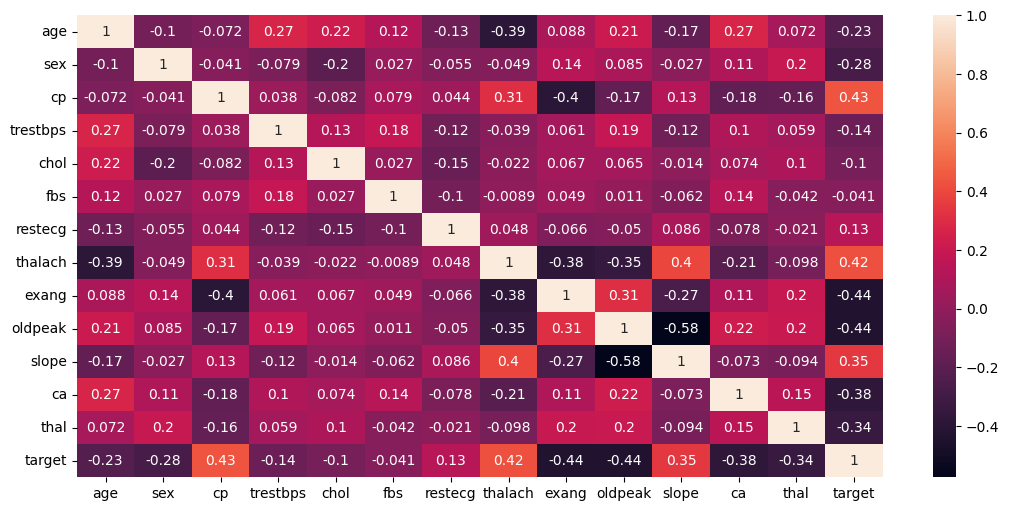

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('heart.csv')
plt.figure(figsize=(13,6))
sns.heatmap(data.corr(),annot=True)

In [14]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [15]:
import pickle

# Modeli kaydet
with open('best_fcnn_model.pkl', 'wb') as f:
    pickle.dump(best_fcnn, f)

print("Model başarıyla kaydedildi.")

Model başarıyla kaydedildi.


In [16]:
# Modeli yükle
with open('best_fcnn_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Test setiyle tahmin yap
y_pred_loaded = loaded_model.predict(X_test)

# Sonuçları değerlendirelim
print("Accuracy:", accuracy_score(y_test, y_pred_loaded))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_loaded))
print("\nClassification Report:\n", classification_report(y_test, y_pred_loaded))

Accuracy: 0.7951219512195122

Confusion Matrix:
 [[80 22]
 [20 83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       102
           1       0.79      0.81      0.80       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



In [17]:
# Modeli yükle
with open('best_fcnn_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Test setiyle tahmin yap
y_pred_loaded = loaded_model.predict(X_test)

# Sonuçları değerlendirelim
print("Accuracy:", accuracy_score(y_test, y_pred_loaded))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_loaded))
print("\nClassification Report:\n", classification_report(y_test, y_pred_loaded))

Accuracy: 0.7951219512195122

Confusion Matrix:
 [[80 22]
 [20 83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       102
           1       0.79      0.81      0.80       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



In [18]:
# Yeni veri (örnek)
new_data = [[45, 2, 130, 250, 0, 2, 160, 0, 1.2, 1, 0, 3, 1]]  # Bir örnek veri

# Tahmin yap
new_pred = loaded_model.predict(new_data)
print("Yeni Veri Tahmini:", "Disease" if new_pred[0] == 1 else "No Disease")

Yeni Veri Tahmini: Disease


C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


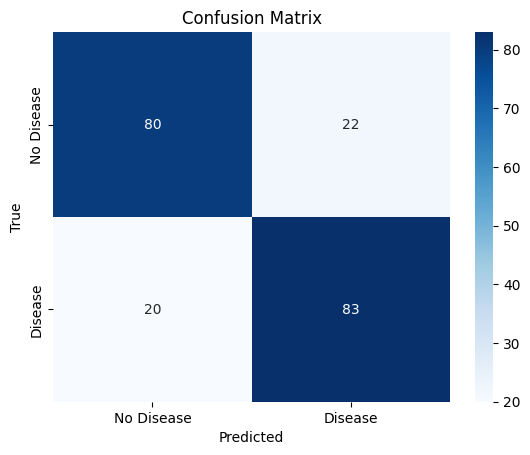

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_loaded)

# Heatmap ile görselleştirme
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

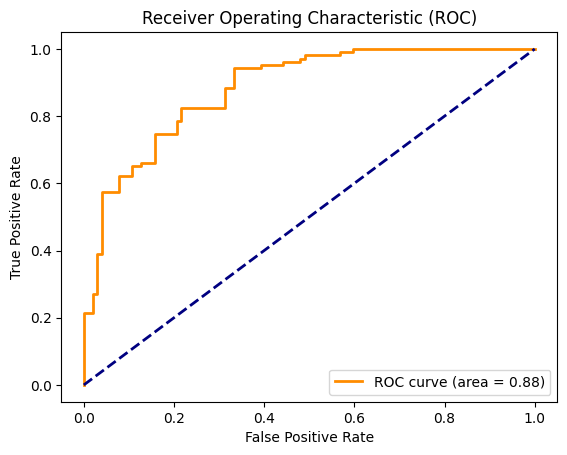

In [20]:
from sklearn.metrics import roc_curve, auc

# ROC Curve hesaplama
fpr, tpr, thresholds = roc_curve(y_test, loaded_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# ROC Curve görselleştirme
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score

# K-Fold Cross Validation
cv_scores = cross_val_score(loaded_model, X, y, cv=5)

print("K-Fold Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

K-Fold Cross-Validation Scores: [0.92195122 0.87804878 0.72682927 0.80487805 0.74146341]
Mean Accuracy: 0.8146341463414635


In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Parametrelerin dağılımı
param_dist = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (256, 128)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': uniform(0.0001, 0.01),
    'max_iter': [1000, 2000]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# En iyi parametreleri ve skoru göster
print("En iyi parametreler:", random_search.best_params_)
print("En iyi skor:", random_search.best_score_)

En iyi parametreler: {'activation': 'tanh', 'hidden_layer_sizes': (128, 64), 'learning_rate_init': np.float64(0.0019182496720710062), 'max_iter': 1000, 'solver': 'adam'}
En iyi skor: 0.8975609756097562


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini kur
rf_model = RandomForestClassifier(random_state=42)

# Modeli eğit
rf_model.fit(X_train, y_train)

# Özelliklerin önemini yazdır
feature_importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance:.4f}')

age: 0.0823
cp: 0.1307
trestbps: 0.0740
chol: 0.0827
fbs: 0.0087
restecg: 0.0157
thalach: 0.1179
exang: 0.0575
oldpeak: 0.1237
slope: 0.0427
ca: 0.1309
thal: 0.1037
sex_1: 0.0297


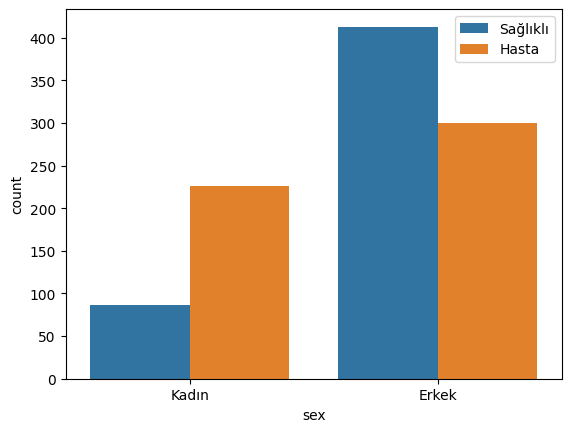

In [24]:
sns.countplot(x='sex',hue="target",data=data)
plt.xticks([0,1],['Kadın','Erkek'])
plt.legend(labels=['Sağlıklı','Hasta'])
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_7440\4281029158.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],bins=20)


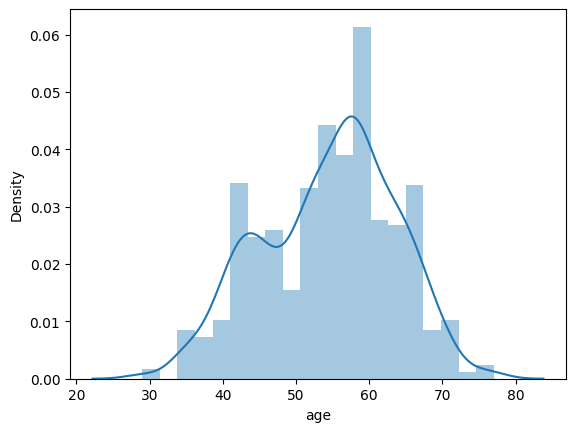

In [25]:
sns.distplot(data['age'],bins=20)
plt.show()